In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import os
import cv2

In [4]:
# Set your data paths
image_train_folder = "../data/data_train/images" 
label_train_folder = "../data/data_train/gt" 

image_val_folder = "../data/data_train/images_val" 
label_val_folder = "../data/data_train/gt_val" 

image_test_folder = "../data/test/images"

In [5]:
# Set desired image size
image_size = (512, 512)

# Read image and label data
image_train_filenames = sorted(os.listdir(image_train_folder))
label_train_filenames = sorted(os.listdir(label_train_folder))

image_val_filenames = sorted(os.listdir(image_val_folder))
label_val_filenames = sorted(os.listdir(label_val_folder))

image_test_filenames = sorted(os.listdir(image_test_folder))

In [9]:
train_images = []
train_labels = []

for image_filename in image_train_filenames:
    image_train_path = os.path.join(image_train_folder, image_filename)
    label_train_filename = image_filename.replace(".tif", ".tif")  # Adjust the label file extension if needed
    label_train_path = os.path.join(label_train_folder, label_train_filename)
    
    # Read and resize the image
    image_train = cv2.imread(image_train_path)
    image_train = cv2.resize(image_train, image_size)
    
    # Normalize the image
    image_train = image_train / 255.0
    
    
    # Read and resize the label
    train_label = cv2.imread(label_train_path, 0)  # Read as grayscale
    train_label = cv2.resize(train_label, image_size)
    
    # Normalize the labels
    train_label = train_label / 255.0
    
    # Append to the data lists
    train_images.append(image_train)
    train_labels.append(train_label)

# Convert data lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Print the shapes of the data arrays
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)

Train images shape: (155, 512, 512, 3)
Train labels shape: (155, 512, 512)


(155, 512, 512, 3)


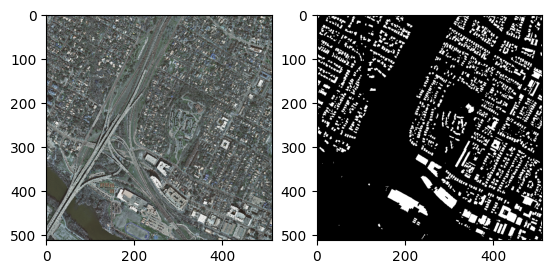

In [12]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(train_images[1], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(train_labels[1], cmap="gray");

In [13]:
train_images_1 = train_images[:31]
train_labels_1 = train_labels[:31]

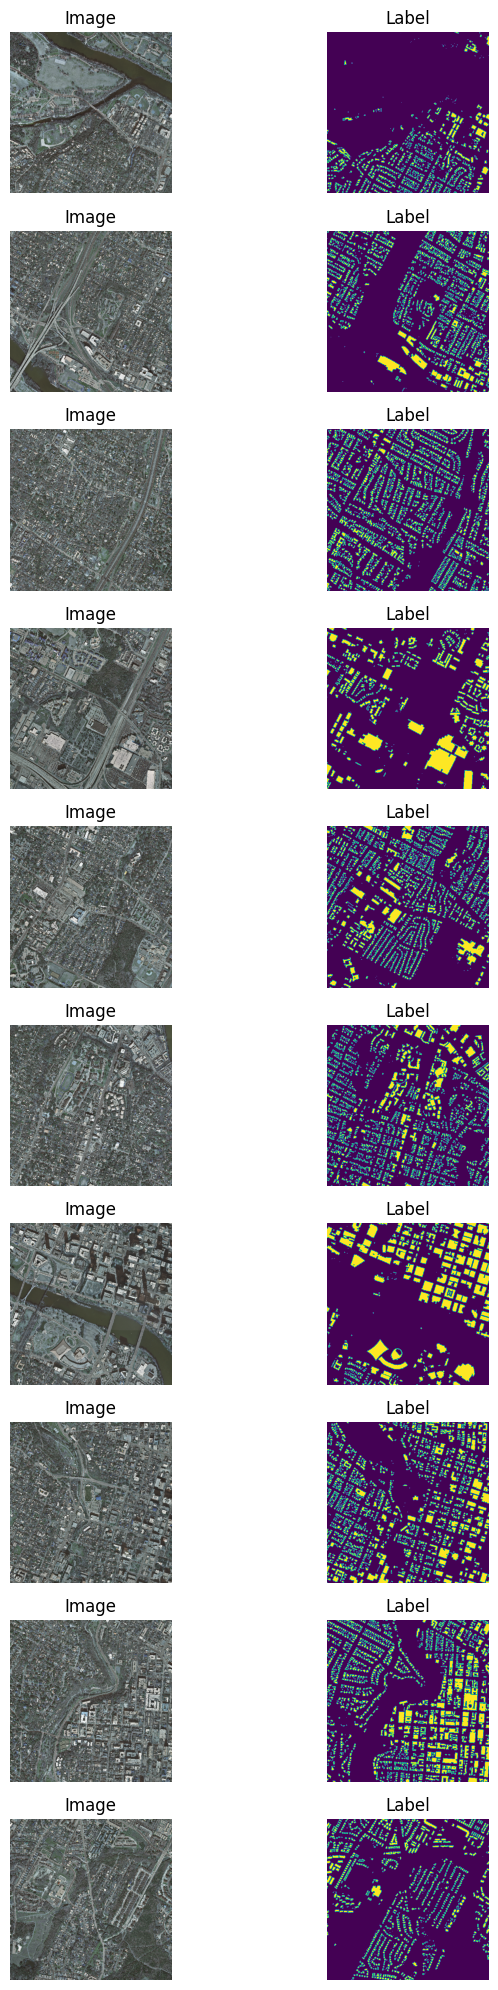

In [14]:
import matplotlib.pyplot as plt

# Plot the train images and labels side by side for the first 10 data samples
fig, axes = plt.subplots(10, 2, figsize=(8, 20))

for i in range(10):
    axes[i, 0].imshow(train_images[i])
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image')

    axes[i, 1].imshow(train_labels[i])
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Label')

plt.tight_layout()
plt.show()

In [16]:
val_images = []
val_labels = []

for image_filename in image_val_filenames:
    image_val_path = os.path.join(image_val_folder, image_filename)
    label_val_filename = image_filename.replace(".tif", ".tif")  # Adjust the label file extension if needed
    label_val_path = os.path.join(label_val_folder, label_val_filename)
    
    # Read and resize the image
    image_val = cv2.imread(image_val_path)
    image_val = cv2.resize(image_val, image_size)
    
    # Normalize the image
    image_val = image_val / 255.0
    
    # Read and resize the label
    val_label = cv2.imread(label_val_path, 0)  # Read as grayscale
    val_label = cv2.resize(val_label, image_size)
    
    # Normalize the label
    val_label = val_label / 255.0
    
    # Append to the data lists
    val_images.append(image_val)
    val_labels.append(val_label)

# Convert data lists to NumPy arrays
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Print the shapes of the data arrays
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

Validation images shape: (25, 512, 512, 3)
Validation labels shape: (25, 512, 512)


In [18]:
val_images_1 = val_images[:5]
val_labels_1 = val_labels[:5]

(155, 512, 512, 3)


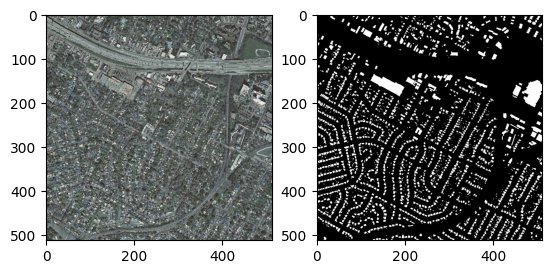

In [19]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(val_images[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(val_labels[0], cmap="gray");

In [20]:
test_images = []

for image_filename in image_test_filenames:
    image_test_path = os.path.join(image_test_folder, image_filename)
        
    # Read and resize the image
    image_test = cv2.imread(image_test_path)
    image_test = cv2.resize(image_test, image_size)
    
    # Normalize the image
    image_test = image_test / 255.0
    
    # Append to the data list
    test_images.append(image_test)

# Convert data list to a NumPy array
test_images = np.array(test_images)

# Print the shape of the data array
print("Test images shape:", test_images.shape)

Test images shape: (180, 512, 512, 3)


In [21]:
test_images_1 = test_images[:36]

(155, 512, 512, 3)


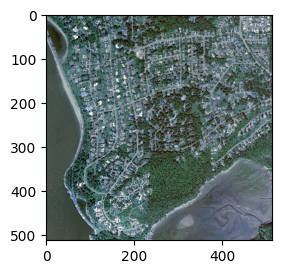

In [22]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(test_images[0], cmap="gray")

In [23]:
X= train_images
y= train_labels

x= test_images

In [24]:
train_images.shape
train_labels.shape

(155, 512, 512)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Activation, BatchNormalization, Concatenate
from tensorflow.keras.applications import VGG19
from tensorflow.keras import backend as K

def loss(y_true, y_pred):
    def dice_loss(y_true, y_pred):
        y_pred = tf.math.sigmoid(y_pred)
        numerator = 2 * tf.reduce_sum(y_true * y_pred)
        denominator = tf.reduce_sum(y_true + y_pred)
        return 1 - numerator / denominator

    y_true = tf.cast(y_true, tf.float32)
    cross_entropy_loss = tf.nn.sigmoid_cross_entropy_with_logits(y_true, y_pred)
    total_loss = cross_entropy_loss + dice_loss(y_true, y_pred)

    return tf.reduce_mean(total_loss)

def iou_metric(y_true, y_pred):
    y_pred = tf.math.round(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    iou = intersection / (union + K.epsilon())
    return iou


class UNet:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.model = self.build_vgg19_unet()

    def conv_block(self, input, num_filters):
        x = Conv2D(num_filters, 3, padding="same")(input)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)

        x = Conv2D(num_filters, 3, padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)

        return x

    def decoder_block(self, input, skip_features, num_filters):
        x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
        x = Concatenate()([x, skip_features])
        x = self.conv_block(x, num_filters)
        return x

    def build_vgg19_unet(self):
        """ Input """
        inputs = Input(self.input_shape)

        """ Pre-trained VGG19 Model """
        vgg19 = VGG19(include_top=False, weights="imagenet", input_tensor=inputs)

        """ Encoder """
        s1 = vgg19.get_layer("block1_conv2").output       ## (512 x 512)
        s2 = vgg19.get_layer("block2_conv2").output       ## (256 x 256)
        s3 = vgg19.get_layer("block3_conv4").output       ## (128 x 128)
        s4 = vgg19.get_layer("block4_conv4").output       ## (64 x 64)

        """ Bridge """
        b1 = vgg19.get_layer("block5_conv4").output       ## (32 x 32)

        """ Decoder """
        d1 = self.decoder_block(b1, s4, 512)              ## (64 x 64)
        d2 = self.decoder_block(d1, s3, 256)              ## (128 x 128)
        d3 = self.decoder_block(d2, s2, 128)              ## (256 x 256)
        d4 = self.decoder_block(d3, s1, 64)               ## (512 x 512)

        """ Output """
        outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

        model = Model(inputs, outputs, name="VGG19_U-Net")
        return model

    def compile(self, optimizer='adam'):
        self.model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    def train(self, x, y, epochs=1, batch_size=32, validation_data=None):
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=loss, metrics=['accuracy', iou_metric])
        lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001, verbose=1)
        self.model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=validation_data, callbacks=[lr_reducer])


    def predict(self, x):
        return self.model.predict(x)

2023-05-24 16:12:38.385206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 16:12:38.619801: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-24 16:12:38.675752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shilpi/.pyenv/versions/3.8.12/envs/solar_roof_segmentation/lib/python3.8/site-packages/cv2

In [26]:
input_shape = (512, 512, 3)
unet = UNet(input_shape)

# Compile the model
unet.compile(optimizer='adam')

# Print the model summary
unet.model.summary()

2023-05-24 16:12:41.725347: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (100)
2023-05-24 16:12:41.725396: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SLB-CBFN4M3): /proc/driver/nvidia/version does not exist
2023-05-24 16:12:41.726034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "VGG19_U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 512, 512, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 512, 512, 64  36928       ['block1_conv1[0][0]']           
                                )                                                       

In [27]:
# Train the model
epochs = 10
batch_size = 16
validation_data = (val_images, val_labels)  # Assuming you have validation data
unet.train(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_images, val_labels))

Epoch 1/10
10/10 [==============================] - 471s 45s/step - loss: 1.5355 - accuracy: 0.7015 - iou_metric: 0.3179 - val_loss: 1.9445 - val_accuracy: 0.1318 - val_iou_metric: 0.1466 - lr: 0.0010
Epoch 2/10
10/10 [==============================] - 442s 44s/step - loss: 1.4494 - accuracy: 0.8440 - iou_metric: 0.4283 - val_loss: 1.9445 - val_accuracy: 0.1318 - val_iou_metric: 0.1466 - lr: 0.0010
Epoch 3/10
10/10 [==============================] - 448s 45s/step - loss: 1.4315 - accuracy: 0.8630 - iou_metric: 0.4522 - val_loss: 1.9445 - val_accuracy: 0.1318 - val_iou_metric: 0.1466 - lr: 0.0010
Epoch 4/10
10/10 [==============================] - 444s 44s/step - loss: 1.4199 - accuracy: 0.8759 - iou_metric: 0.4551 - val_loss: 1.9445 - val_accuracy: 0.1318 - val_iou_metric: 0.1466 - lr: 0.0010
Epoch 5/10
10/10 [==============================] - 441s 44s/step - loss: 1.4066 - accuracy: 0.8852 - iou_metric: 0.4834 - val_loss: 1.9433 - val_accuracy: 0.1330 - val_iou_metric: 0.1468 - lr: 0.

In [28]:
test_labels_pred = unet.predict(test_images)
test_labels_pred

6/6 [==============================] - 156s 26s/step


array([[[[0.05172889],
         [0.03127741],
         [0.03404406],
         ...,
         [0.09356751],
         [0.06207037],
         [0.07032605]],

        [[0.03948585],
         [0.03253638],
         [0.0239417 ],
         ...,
         [0.12784904],
         [0.07553441],
         [0.07596164]],

        [[0.02941707],
         [0.01436023],
         [0.01504115],
         ...,
         [0.0985982 ],
         [0.0664302 ],
         [0.08265688]],

        ...,

        [[0.04578895],
         [0.03406711],
         [0.03283927],
         ...,
         [0.03051876],
         [0.04332228],
         [0.05567987]],

        [[0.05863544],
         [0.03797989],
         [0.03251535],
         ...,
         [0.03301959],
         [0.04687734],
         [0.06743707]],

        [[0.09706462],
         [0.07810774],
         [0.06983586],
         ...,
         [0.05172442],
         [0.05491718],
         [0.07375379]]],


       [[[0.06311791],
         [0.04780013],
         [0.04

(155, 512, 512, 3)


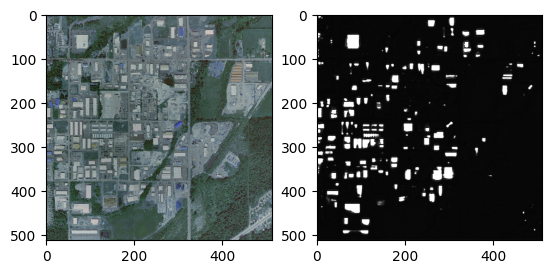

In [29]:
print(train_images.shape)
plt.subplot(1,2,1)
plt.imshow(test_images[21], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(test_labels_pred[21], cmap="gray");

In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1./255)
#target_size = (224, 224)

#train_generator = train_datagen.flow_from_directory(
    #'data/train/',
    #target_size=target_size,
    #batch_size=32)

#model.fit(train_generator,
          #epochs=num_epochs)